In [218]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

Import necessary libraries(requests, pandas, BeautifulSoup) for data extraction

In [219]:
url = 'https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW'

response = requests.get(url)

Define the url and send an HTTP GET request to the URL

In [220]:
print(response.status_code)

200


Check to see if the request was successful(200 indicates success)

In [221]:
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all('table')
table = tables[0]

Parse the HTML content of the page. Then find the correct table containing the movie data.

In [222]:
rows = table.find_all('tr')

rank = []
title = []
year = []
lifetime_gross = []

Extract the table rows. Then, initialize empty lists to store data.

In [223]:
for row in rows[1:]:  # Skip the header row
    columns = row.find_all('td')
    rank.append(columns[0].text.strip())
    title.append(columns[1].text.strip())
    
    # Extract the year and ensure it has four digits
    year_text = columns[3].text.strip()
    year_parts = year_text.split()
    for part in year_parts:
        if part.isdigit() and len(part) == 4:
            year.append(part)
            break
    else:
        year.append('N/A')  # Handle cases where the year is not found
        
    gross_text = columns[2].text.strip().replace(',', '').replace('$', '')
    lifetime_gross.append(gross_text)  # Removed symbols

Create a for loop that extracts the data from the table on the website into the empty column lists created earlier. Ensure that the data in the year column has four digits. Remove the dollar signs and commas from the lifetime gross column when extracting.

In [224]:
data = {'Rank': rank, 'Title': title, 'Year': year, 'Lifetime Gross': lifetime_gross}
df = pd.DataFrame(data)

Create a DataFrame by attaching each column list to the column into the newly created DataFrame.

In [225]:
df['Year'] = pd.to_numeric(df['Year'])
df['Lifetime Gross'] = pd.to_numeric(df['Lifetime Gross'])

Convert the year and lifetime gross columns from strings to integers to graph later on.

In [238]:
print(df)
df.to_csv('/Users/brandoncheung/Desktop/I310D.csv', index=False)

    Rank                                          Title  Year  Lifetime Gross
0      1                                         Avatar  2009      2923706026
1      2                              Avengers: Endgame  2019      2799439100
2      3                       Avatar: The Way of Water  2022      2320250281
3      4                                        Titanic  1997      2264743305
4      5     Star Wars: Episode VII - The Force Awakens  2015      2071310218
..   ...                                            ...   ...             ...
195  196                             The Little Mermaid  2023       569626289
196  197                             Kong: Skull Island  2017       568652812
197  198  Mission: Impossible - Dead Reckoning Part One  2023       567535383
198  199                                     The Smurfs  2011       563749323
199  200                                         Cars 2  2011       559852396

[200 rows x 4 columns]


Print the DataFrame. Download

In [228]:
import matplotlib.pyplot as plt

Import necessary libraries needed to plot graphs

In [233]:
df['Lifetime Gross'].describe().apply("{0:.2f}".format)

count           200.00
mean      908395096.68
std       364563849.88
min       559852396.00
25%       681594093.25
50%       807530654.50
75%      1018836588.50
max      2923706026.00
Name: Lifetime Gross, dtype: object

Obtain descriptive statistics on the lifetime gross income of the top 200 movies.

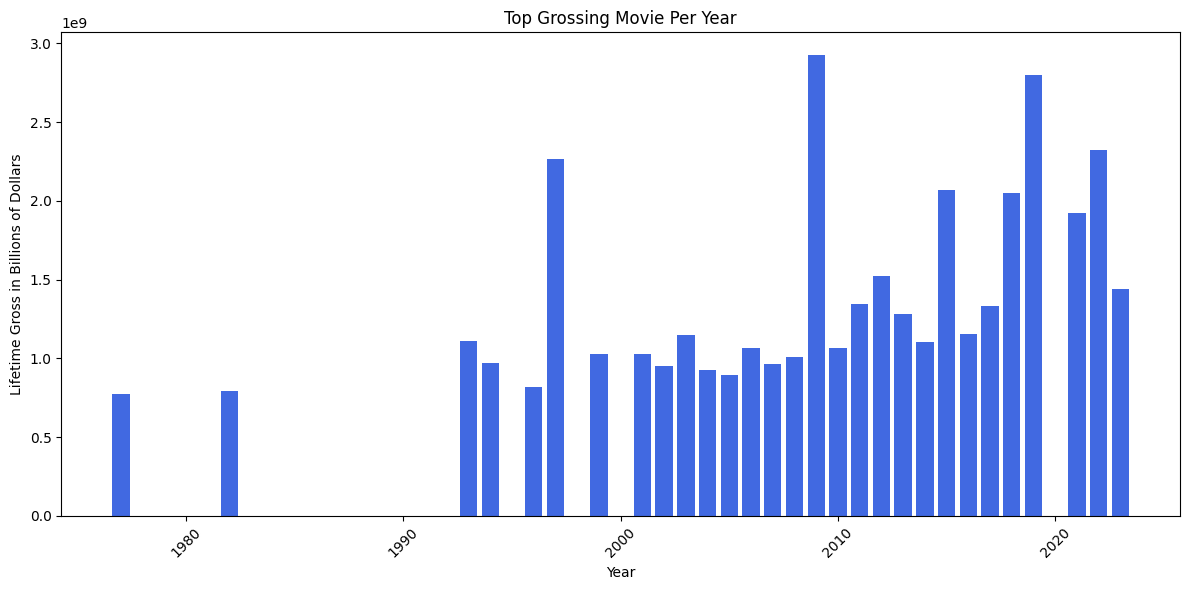

In [237]:
top_movies = df.groupby('Year').apply(lambda x: x[x['Lifetime Gross'] == x['Lifetime Gross'].max()])

plt.figure(figsize=(12, 6))
plt.bar(top_movies['Year'], top_movies['Lifetime Gross'], color='royalblue')
plt.xlabel('Year')
plt.ylabel('Lifetime Gross in Billions of Dollars')
plt.title('Top Grossing Movie Per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Create a new DataFrame called top_movies that takes both the highest grossing movie of each year and the year. Plot a bar graph with the top_movies DataFrame with the Year as the x-axis and the Lifetime Gross as the y-axis. Adjust the layout/color as needed.